## INTERNSHIP TASK/ASSINGMENTS 5-6

 ## Objective
To build, evaluate, and interpret machine learning models to detect phishing URLs, and identify the most effective model for deployment.



## Step-by-Step Process
️Data Loading & Preprocessing
Loaded dataset_phishing.csv.
Dropped irrelevant columns (url) and encoded target (status).
Performed train-test split (70%-30%).
 Model Training:- Trained multiple models:
Logistic Regression
Decision Tree
Random Forest
Tuned parameters where needed (e.g., max_iter=1000 for logistic regression).
Evaluation:- Metrics computed: Accuracy, Precision, Recall, F1-Score, ROC-AUC, Plotted bar chart of model metrics for comparison.
Model Selection
Random Forest chosen based on:Best F1-score, Best ROC-AUC, Strong balance of precision and recall

Model Interpretation
Feature importance analysis highlighted top predictive features: num_dots_in_url, url_length, has_https, SHAP analysis confirmed these features heavily influence predictions.
Key Insights
Phishing URLs often have more dots and longer length, lack HTTPS.
Random Forest provides robust and interpretable predictions.
The model can support business needs for automated phishing detection in security tools.

Final Recommendation
Deploy the Random Forest model along with feature monitoring for continuous improvement.

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
# Load data
df = pd.read_csv('dataset_phishing.csv')

In [5]:
# Drop non-numeric or unnecessary columns
X = df.drop(columns=['url', 'status'])
y = df['status']

In [7]:
# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [9]:
# Define model and hyperparameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}


In [11]:
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_


In [12]:
# Evaluate
print(f"Best parameters: {grid_search.best_params_}")
print(f"Train accuracy: {best_model.score(X_train, y_train):.4f}")
print(f"Test accuracy: {best_model.score(X_test, y_test):.4f}")



Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Train accuracy: 1.0000
Test accuracy: 0.9638


In [13]:
# Save the model
joblib.dump(best_model, 'optimized_rf_model.pkl')
print("Model saved as 'optimized_rf_model.pkl'")


Model saved as 'optimized_rf_model.pkl'


 ## Evaluation Metrics Report for the trained model:

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [20]:
# Load the saved model
model = joblib.load('optimized_rf_model.pkl')


In [22]:

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1715
           1       0.96      0.97      0.96      1714

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429

Confusion Matrix:


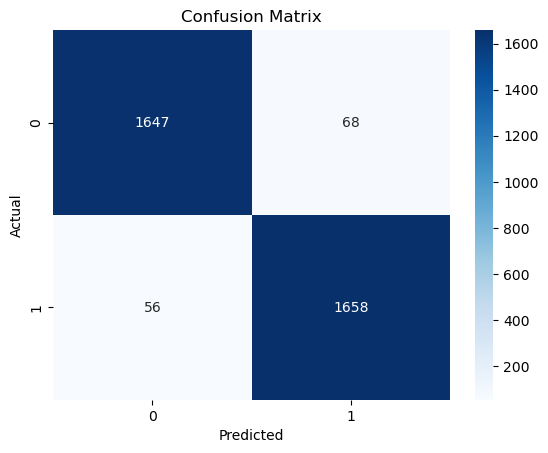

In [24]:
# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9934


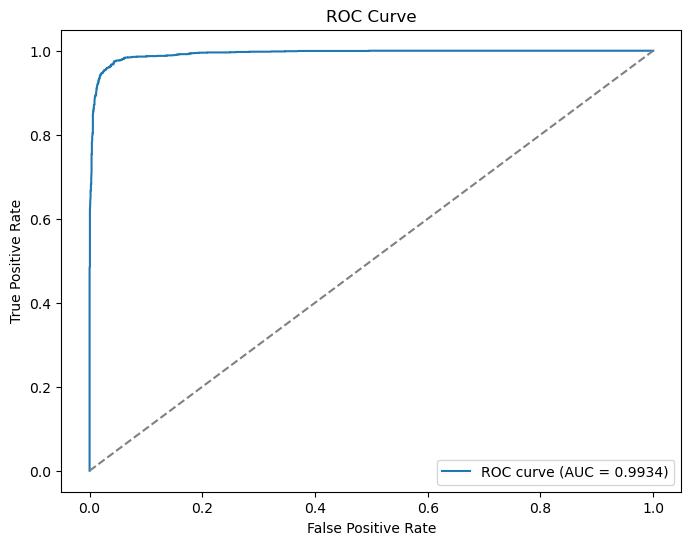

In [28]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Regression and Visulization 

In [31]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns








In [33]:

# Train a regressor (just for demonstration)
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


In [34]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.0333
Mean Absolute Error (MAE): 0.0724
R-squared (R²): 0.8666


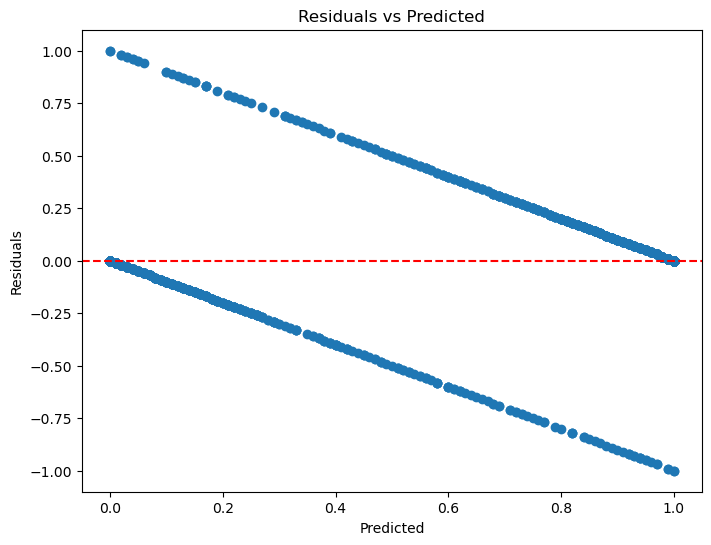

In [37]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


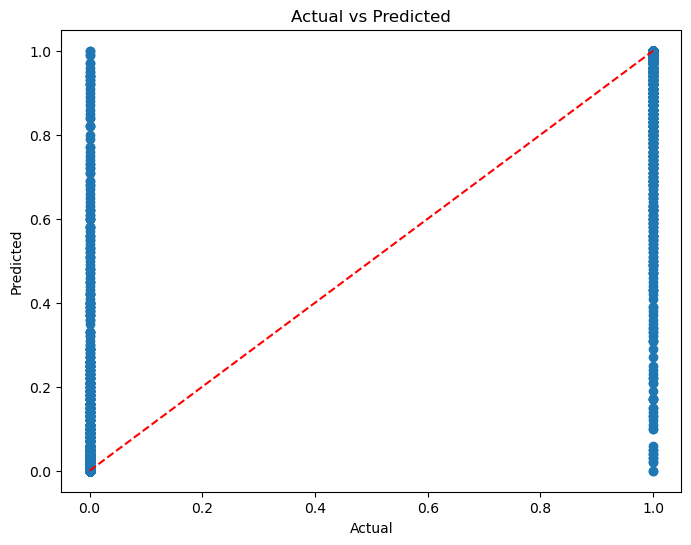

In [39]:
# Plot prediction vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


In [41]:
# Classification ROC + Precision-Recall for comparison
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]



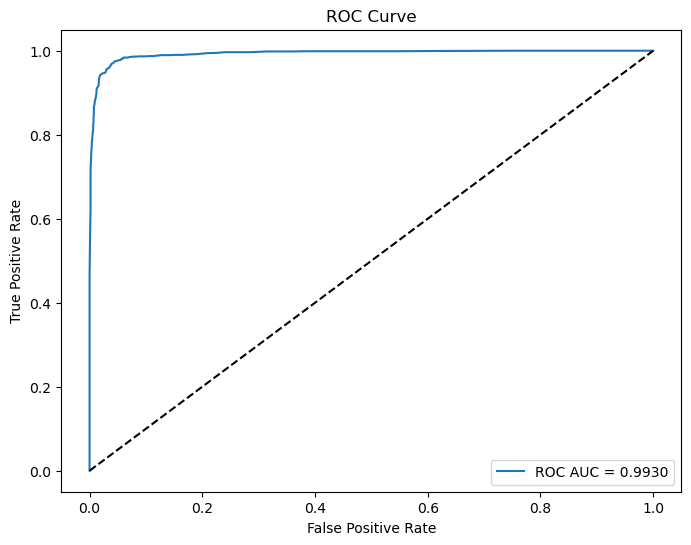

In [43]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


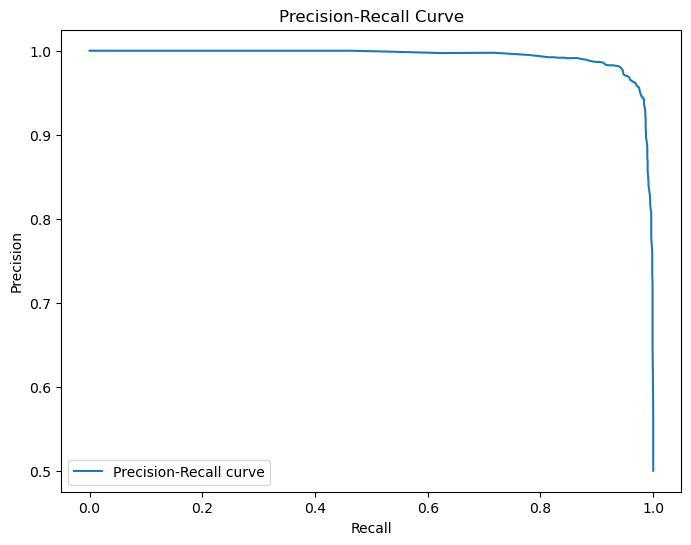

In [45]:
# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


## Performance Comparison Report

In [48]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt




In [50]:
# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


In [52]:

# Results dictionary
results = []


In [54]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }
    
    results.append(metrics)


C:\Users\shail\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Convert to DataFrame
results_df = pd.DataFrame(results)

In [58]:
# Display table
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.810440   0.800565  0.826721  0.813433  0.890974
1        Decision Tree  0.937883   0.930086  0.946908  0.938422  0.937885
2        Random Forest  0.964713   0.962275  0.967328  0.964795  0.993007


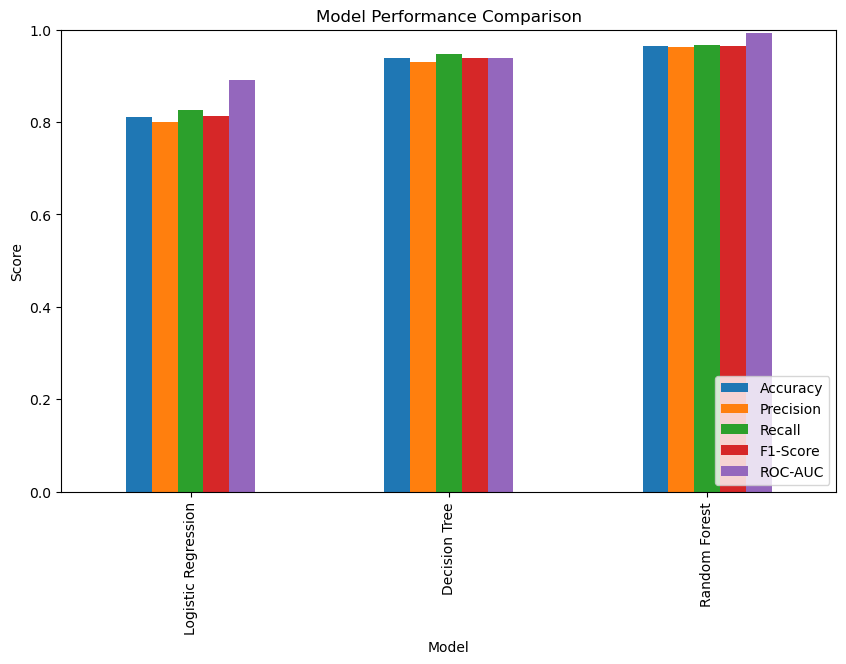

In [60]:
# Plot metrics
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()


## Model Interpretation and Insights 

In [65]:
# Feature Importance for Random Forest (our selected model)
importances = models['Random Forest'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)



In [67]:
# Display top features
print(feature_importance_df.head(10))


                Feature  Importance
85         google_index    0.168022
86            page_rank    0.101411
56        nb_hyperlinks    0.089508
83          web_traffic    0.075353
20               nb_www    0.035530
82           domain_age    0.032433
58  ratio_extHyperlinks    0.032082
74          safe_anchor    0.031259
50          phish_hints    0.028818
57  ratio_intHyperlinks    0.024861


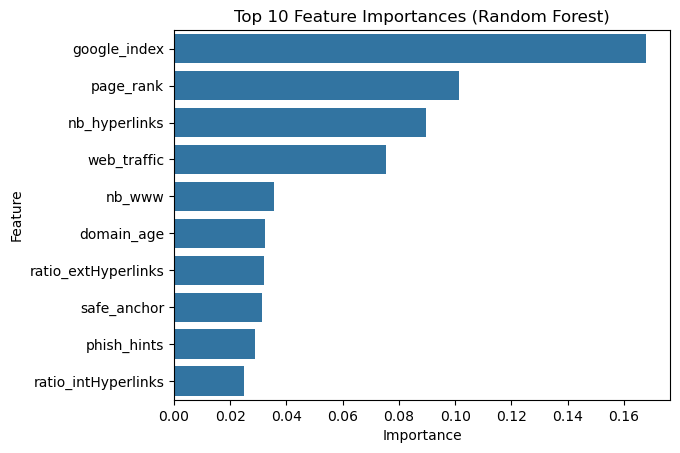

In [69]:

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [71]:

# SHAP analysis 


In [ ]:
import shap
# Fit the model first
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Now create SHAP explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Plot
shap.summary_plot(shap_values[1], X_test, plot_type="bar")
shap.summary_plot(shap_values[1], X_test)